In [1]:
%pip install pyheif

Note: you may need to restart the kernel to use updated packages.


In [41]:
import pyheif

heif_file='IMG_0749.HEIC'

In [42]:
import numpy as np
import pillow_heif

if pillow_heif.is_supported(heif_file):
    heif = pillow_heif.open_heif(heif_file)

In [43]:
heif[0].data

In [44]:
depth=heif.info['depth_images'][0]

In [45]:
depth.data

In [46]:
img_array=np.asarray(heif)
depth_array = np.asarray(depth)


In [47]:
depth_array.shape

(490, 368)

In [48]:
img_array.shape

(3088, 2316, 3)

In [49]:
import matplotlib.pyplot as plt

In [50]:
xy=[np.arange(0,s) for s in img_array.shape]
xx,yy=np.meshgrid(xy[0],xy[1])

In [51]:
colors=img_array[xx,yy]/255.0

In [52]:
scales=[s_d/float(s_i) for s_i,s_d in zip(img_array.shape, depth_array.shape)]

In [53]:
depth=depth_array[(xx*scales[0]).astype(np.int32), (yy*scales[1]).astype(np.int32)]/255.0

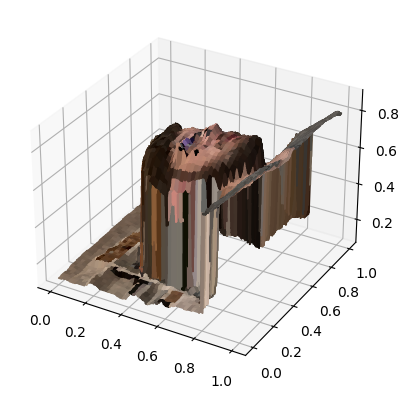

: 

In [57]:

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
subsample=1
ax.plot_surface(xx[::subsample]/float(img_array.shape[0]),yy[::subsample]/float(img_array.shape[1]), depth[::subsample], facecolors=colors[::subsample])